<a href="https://colab.research.google.com/github/ShriramJana/AI-Workshop/blob/main/Linear_Regression_(Using_Library).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

df = pd.read_csv('/content/Data1.csv')


In [2]:
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [4]:
df.columns

Index(['Location', 'PovPct', 'Brth15to17', 'Brth18to19', 'ViolCrime',
       'TeenBrth'],
      dtype='object')

In [5]:
df.dtypes

Location       object
PovPct        float64
Brth15to17    float64
Brth18to19    float64
ViolCrime     float64
TeenBrth      float64
dtype: object

In [6]:
df[['PovPct','Brth15to17']]

,PovPct,Brth15to17
0,20.1,31.5
1,7.1,18.9
2,16.1,35.0
3,14.9,31.6
4,16.7,22.6
5,8.8,26.2
6,9.7,14.1
7,10.3,24.7
8,22.0,44.8
9,16.2,23.2


In [8]:
# Given set of data where Pov - Birth15to17

# x: Birth15to17 [dependent/ Target/ Prediction]
# y : Pov [independent]

# Regression f(x) = y  optimal value 'f
# Simple linear regression: equation of a line y = w*x + b

data = df[['PovPct','Brth15to17']]
data.head()

,PovPct,Brth15to17
0,20.1,31.5
1,7.1,18.9
2,16.1,35.0
3,14.9,31.6
4,16.7,22.6


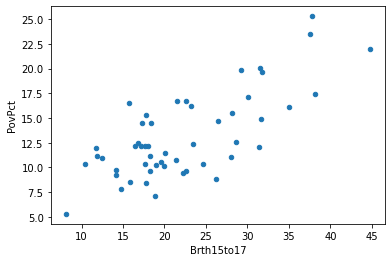

In [9]:
data.plot( x = 'Brth15to17', y = 'PovPct', kind = 'scatter')

In [10]:
data.shape

(51, 2)

In [11]:
#split the data, train data(80%), test data(20%)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=50)

In [12]:
print(train_data.shape)
print(test_data.shape)

(40, 2)
(11, 2)


In [13]:
x_train = train_data['Brth15to17']
y_train = train_data['PovPct']

x_test = test_data['Brth15to17']
y_test = test_data['PovPct']


In [14]:
# Use the train data to call Linear Regression Model
model= linear_model.LinearRegression()
pred = model.fit(x_train.to_numpy().reshape(-1,1), y_train.to_numpy().reshape(-1,1))

In [15]:
# Simple linear regression: equation of a line (y = w*x + b)
w = print(pred.coef_) # w
b = print(pred.intercept_) # b

[[0.37493863]]
[4.86666835]


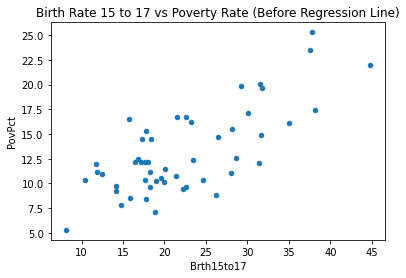

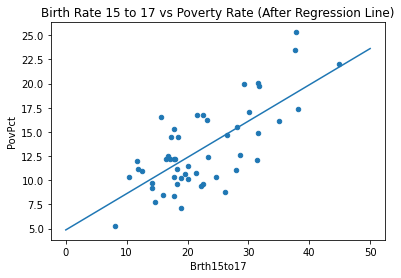

In [16]:
#plot
import numpy as np
import matplotlib.pyplot as plt

data.plot( x = 'Brth15to17', y = 'PovPct', kind = 'scatter', title = "Birth Rate 15 to 17 vs Poverty Rate (Before Regression Line)")
def drawLine(w, b):
  x = np.linspace(0,50,100)
  plt.plot(x, w * x + b)

data.plot( x = 'Brth15to17', y = 'PovPct', kind = 'scatter', title = 'Birth Rate 15 to 17 vs Poverty Rate (After Regression Line)')
drawLine(pred.coef_[0], pred.intercept_)

In [17]:
# Prediction

print('Predicted')
print(pred.predict(x_test.to_numpy().reshape(-1,1)))
print()

print('Actual')
print(y_test)


Predicted
[[16.15232107]
 [12.40293478]
 [12.21546547]
 [11.95300843]
 [13.1903059 ]
 [11.16563731]
 [ 9.25345031]
 [21.6639189 ]
 [10.82819254]
 [13.64023226]
 [15.8148763 ]]

Actual
36    17.1
35    11.5
39    10.6
1      7.1
25     9.4
47    12.5
34    12.0
8     22.0
49     8.5
13    12.4
40    19.9
Name: PovPct, dtype: float64


In [18]:
# Regression Line (y = w*x + b)
print("PovPct = " + str(pred.coef_) + "*Brth15to17 + " + str(pred.intercept_))


PovPct = [[0.37493863]]*Brth15to17 + [4.86666835]
